In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# names for training and testing data
train_files = ['resnet18_train.csv', 'resnet34_train.csv', 'resnet50_train.csv', 'resnet50_withmixup_train.csv']
test_files = ['resnet18_test.csv', 'resnet34_test.csv', 'resnet50_test.csv', 'resnet50_withmixup_test.csv']
model_names = ['ResNet18', 'ResNet34', 'ResNet50', 'ResNet50 with Mixup']

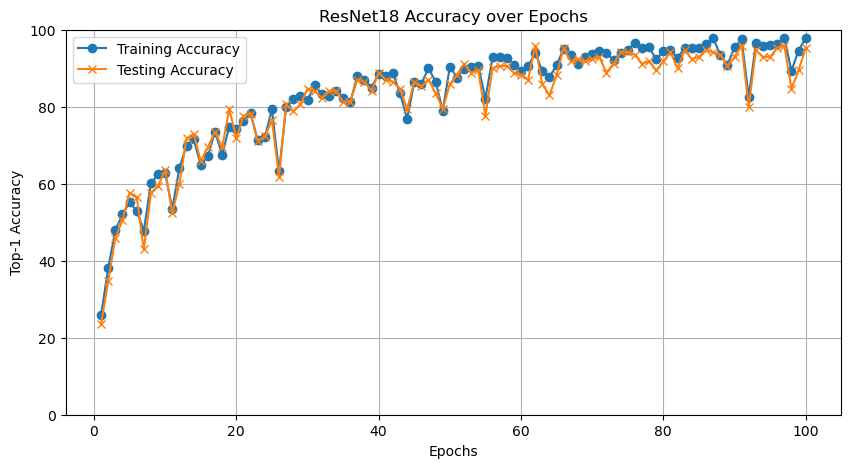

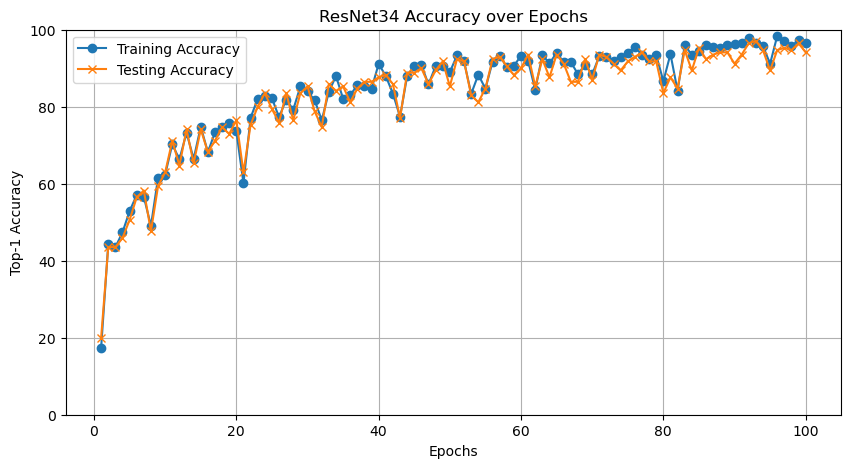

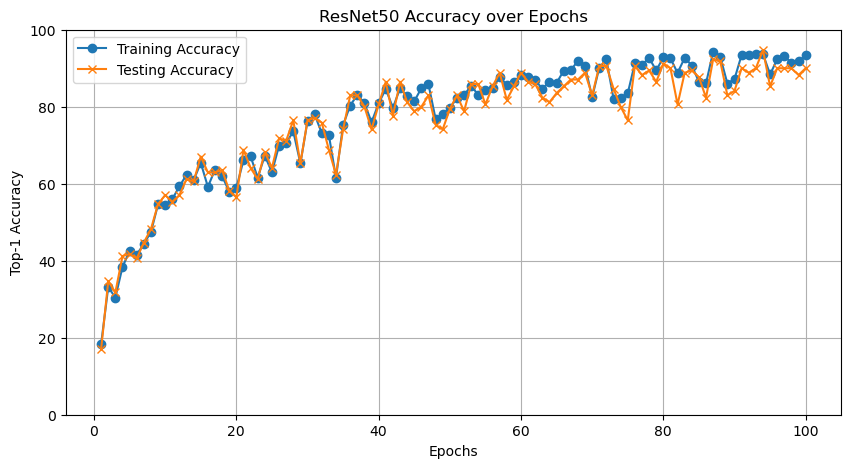

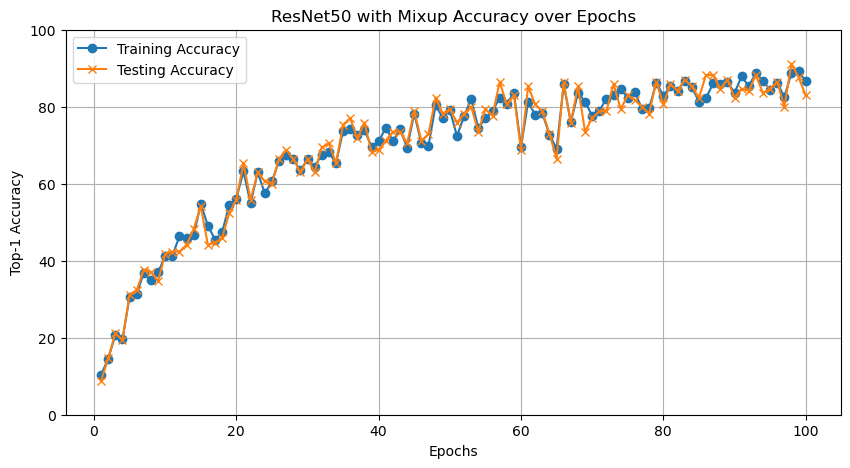

In [3]:
train_accuracies = []
test_accuracies = []

x = range(len(model_names))
bar_width = 0.35

# accuracy over epochs for each model
for train_file, test_file, model_name in zip(train_files, test_files, model_names):
    # read training and testing data
    train_df = pd.read_csv(train_file)
    test_df = pd.read_csv(test_file)
    
    # plot training accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(train_df['Epoch'], train_df['Top-1 Accuracy'], label='Training Accuracy', marker='o')
    
    # plot testing accuracy
    plt.plot(test_df['Epoch'], test_df['Top-1 Accuracy'], label='Testing Accuracy', marker='x')
    
    # add titles and labels
    plt.title(f'{model_name} Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Top-1 Accuracy')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 100)
    plt.show()

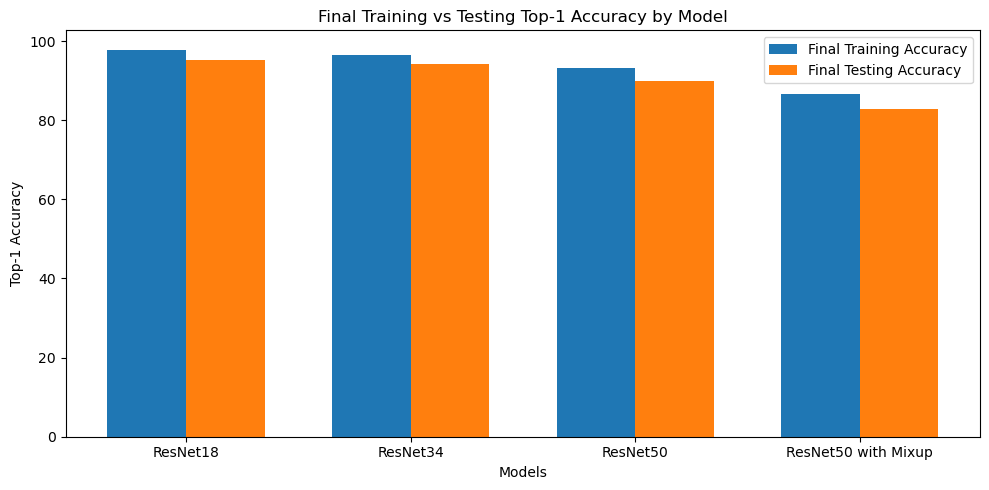

In [4]:
# extract final epoch accuracies
for train_file, test_file in zip(train_files, test_files):
    train_df = pd.read_csv(train_file)
    test_df = pd.read_csv(test_file)
    train_accuracies.append(train_df['Top-1 Accuracy'].iloc[-1])
    test_accuracies.append(test_df['Top-1 Accuracy'].iloc[-1])

# bar chart for final accuracies
plt.figure(figsize=(10, 5))
plt.bar(x, train_accuracies, bar_width, label='Final Training Accuracy')
plt.bar([p + bar_width for p in x], test_accuracies, bar_width, label='Final Testing Accuracy')
plt.xlabel('Models')
plt.ylabel('Top-1 Accuracy')
plt.title('Final Training vs Testing Top-1 Accuracy by Model')
plt.xticks([p + bar_width / 2 for p in x], model_names)
plt.legend()
plt.tight_layout()
plt.show()

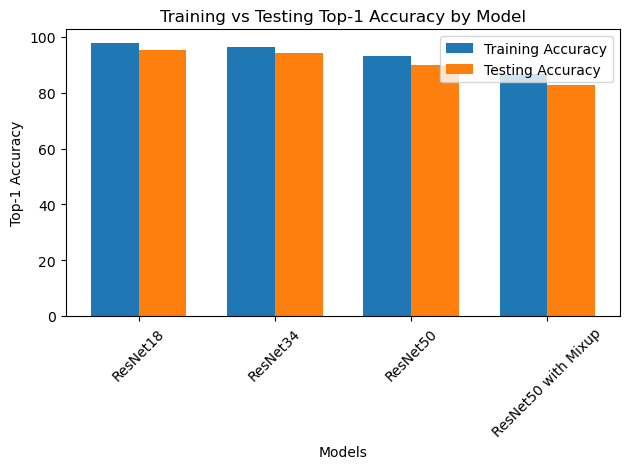

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

model_files = [
    ('resnet18_train.csv', 'resnet18_test.csv'),
    ('resnet34_train.csv', 'resnet34_test.csv'),
    ('resnet50_train.csv', 'resnet50_test.csv'),
    ('resnet50_withmixup_train.csv', 'resnet50_withmixup_test.csv')
]

train_files = ['resnet18_train.csv', 'resnet34_train.csv', 'resnet50_train.csv', 'resnet50_withmixup_train.csv']
test_files = ['resnet18_test.csv', 'resnet34_test.csv', 'resnet50_test.csv', 'resnet50_withmixup_test.csv']

model_names = ['ResNet18', 'ResNet34', 'ResNet50', 'ResNet50 with Mixup']

# Initialize empty lists to store final accuracies
train_accuracies = []
test_accuracies = []

# Load data from the CSV files
for file in train_files:
    df = pd.read_csv(file)
    train_accuracies.append(df['Top-1 Accuracy'].iloc[-1])  # Get last epoch's accuracy

for file in test_files:
    df = pd.read_csv(file)
    test_accuracies.append(df['Top-1 Accuracy'].iloc[-1])  # Get last epoch's accuracy

# Set up the bar chart
x = range(len(model_names))
bar_width = 0.35

fig, ax = plt.subplots()
train_bars = ax.bar(x, train_accuracies, bar_width, label='Training Accuracy')
test_bars = ax.bar([p + bar_width for p in x], test_accuracies, bar_width, label='Testing Accuracy')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Top-1 Accuracy')
ax.set_title('Training vs Testing Top-1 Accuracy by Model')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(model_names)
ax.legend()

# Add a legend
plt.legend()

# Display the bar chart
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()


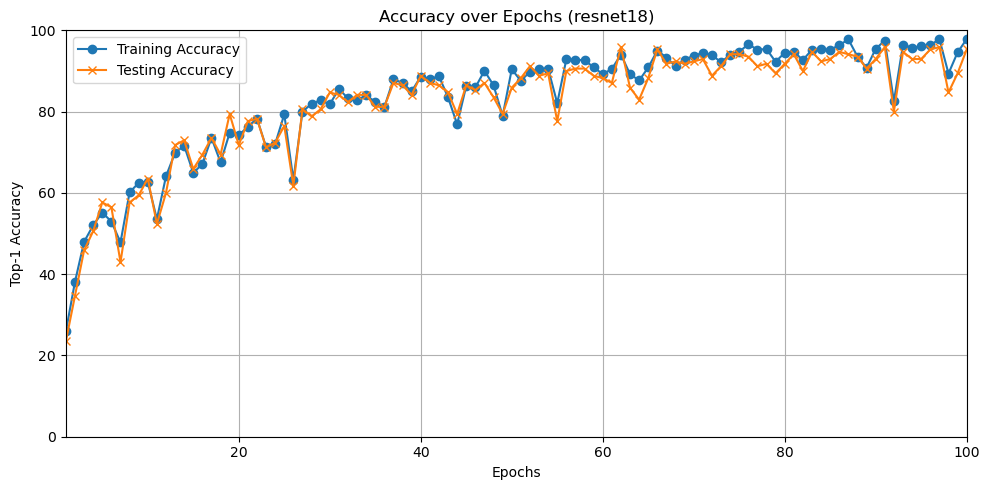

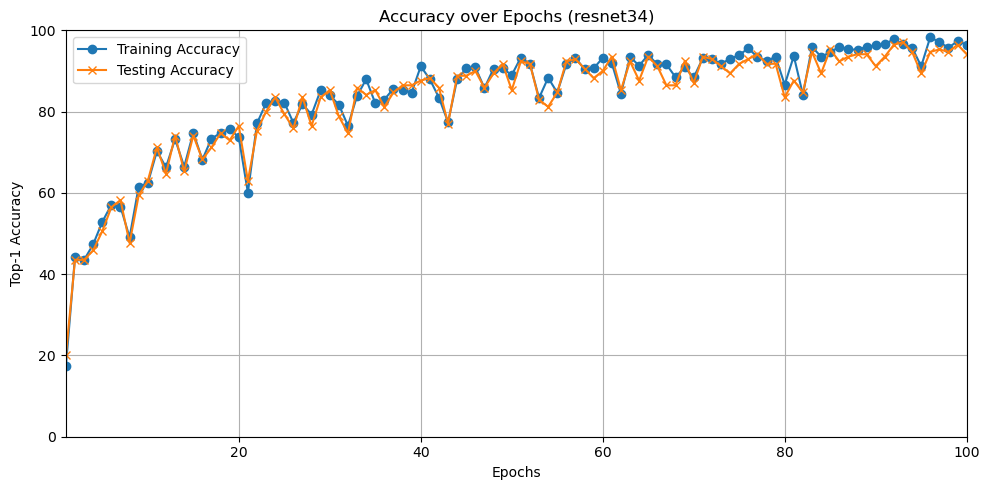

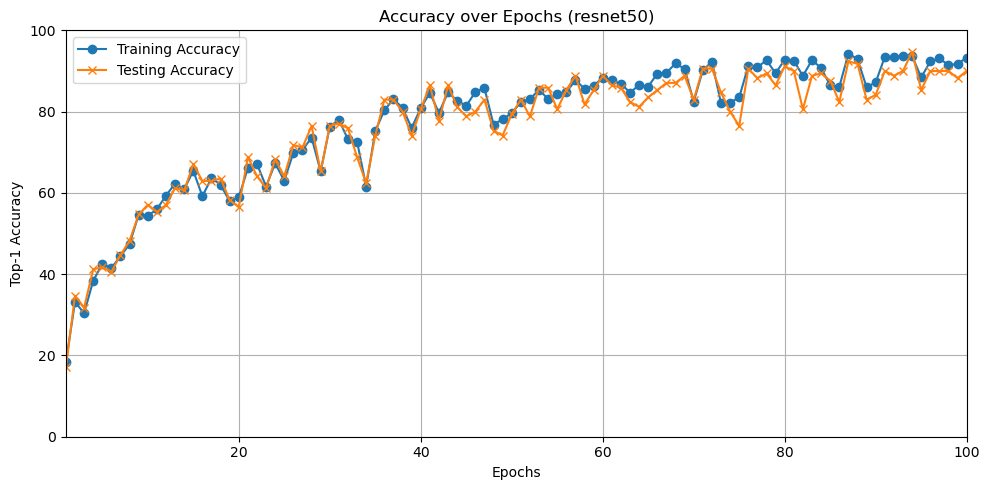

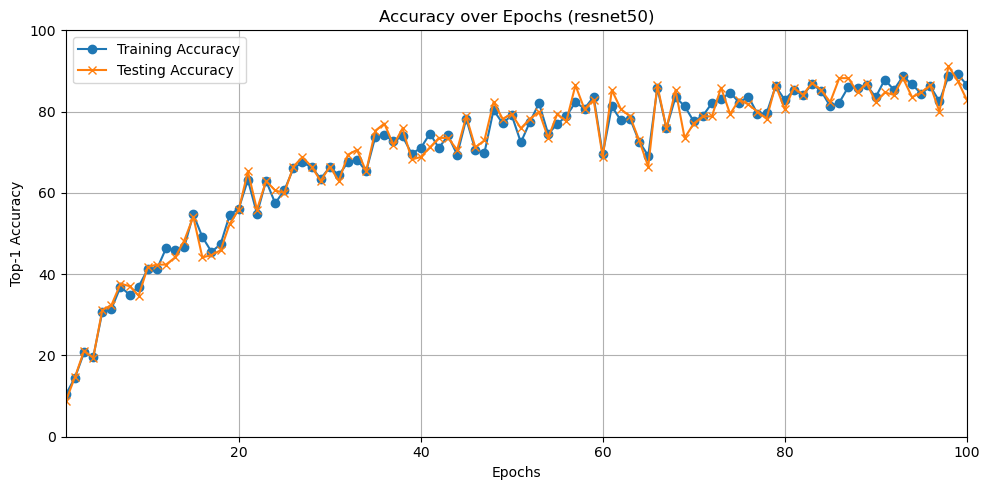

In [6]:
df = pd.read_csv(train_files[0])
epoch_range = (1, df['Epoch'].max())  # Starting at 1 to the max epoch in the data

# Plotting each model's accuracy over epochs
for train_file, test_file in zip(train_files, test_files):
    train_df = pd.read_csv(train_file)
    test_df = pd.read_csv(test_file)

    plt.figure(figsize=(10, 5))

    # Plot training accuracy
    plt.plot(train_df['Epoch'], train_df['Top-1 Accuracy'], label='Training Accuracy', marker='o')

    # Plot testing accuracy
    plt.plot(test_df['Epoch'], test_df['Top-1 Accuracy'], label='Testing Accuracy', marker='x')

    # Adding titles and labels
    plt.title(f'Accuracy over Epochs ({train_file.split("_")[0]})')
    plt.xlabel('Epochs')
    plt.ylabel('Top-1 Accuracy')
    plt.legend()
    plt.grid(True)

    # Set the limits for x-axis (Epochs) and y-axis (Accuracy)
    plt.xlim(epoch_range)
    plt.ylim(0, 100)

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()